# Classifying the Iris dataset with a `edunn` neural network

Lets train a network to classify the [Iris](https://www.kaggle.com/uciml/iris) dataset. You can experiment adding/removing layers from the network.


Dataset iris: 150 samples, 4 features, 3 classes (['setosa', 'versicolor', 'virginica'])


optim. Sequential_3:   0%|          | 0/1000 [00:00<?, ?it/s]

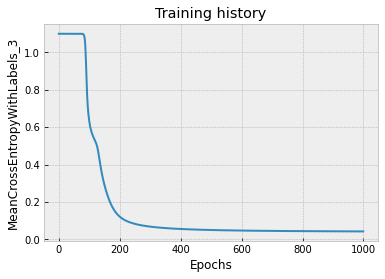

Accuracy: 0.9866666666666667 (3 classes)
Confusion matrix: (rows true, columns pred)
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


In [4]:
%pip install edunn 
import edunn as nn
import numpy as np

# Load dataset `iris`
dataset_name="iris"
x,y,classes=nn.datasets.load_classification(dataset_name)

# Calculate number of classes and print dataset info
n, din = x.shape
n_classes = y.max()+1
print(f"Dataset {dataset_name}: {n} samples, {din} features, {n_classes} classes ({classes})")


# Normalize input features
x = (x-x.mean(axis=0))/x.std(axis=0)


# Train three layer networknetwork
model = nn.Sequential([nn.Dense(din,5,activation_name="relu"),
                       nn.Dense(5,n_classes,activation_name="softmax"),
                      ])

error = nn.MeanError(nn.CrossEntropyWithLabels())
optimizer = nn.GradientDescent(lr=0.1,epochs=1000,batch_size=32)

# Optimize and plot error history
history = optimizer.optimize(model,x,y,error)
nn.plot.plot_history(history,error_name=error.name)


# Calcualte metrics
y_pred=model.forward(x)
y_pred_labels=nn.utils.onehot2labels(y_pred)
nn.metrics.classification_summary(y,y_pred_labels)